## Q-01

#### Prepare a prediction model for profit of 50_startups data.
#### Do transformations for getting better predictions of profit and
#### make a table containing R^2 value for each prepared model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
startup = pd.read_csv('50_Startups.csv')
startup.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup.shape

(50, 5)

In [6]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
startup[startup.duplicated()].shape

(0, 5)

In [32]:
startup=startup.rename({'R&D Spend':'RandD_Spend','Marketing Spend':'Marketing_Spend'},axis=1)

In [14]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


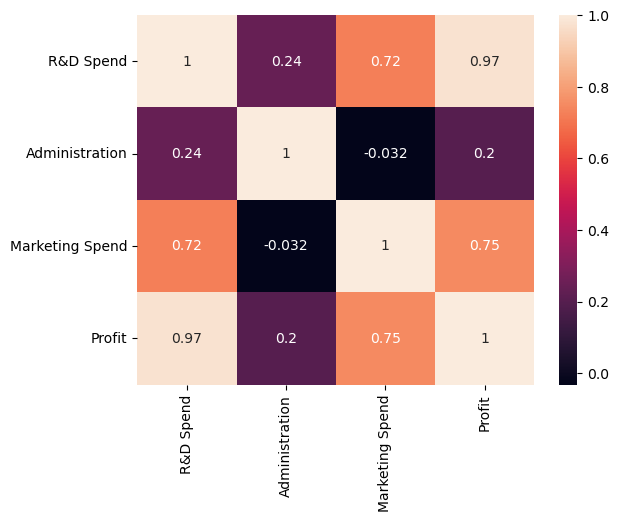

In [9]:
#checking the co relation of all the variables present in datasets
sns.heatmap(startup.corr(), annot=True) 
plt.show()

In [10]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


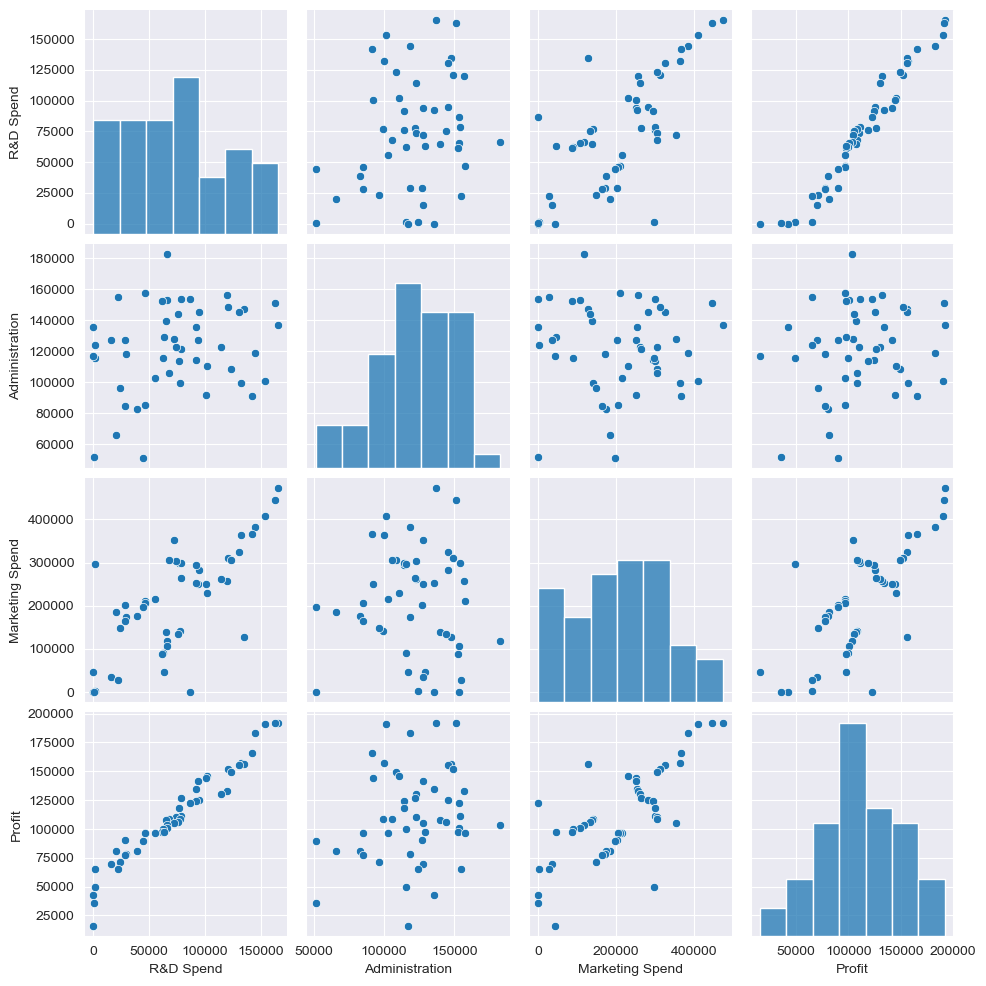

In [27]:
sns.pairplot(startup)
plt.show()

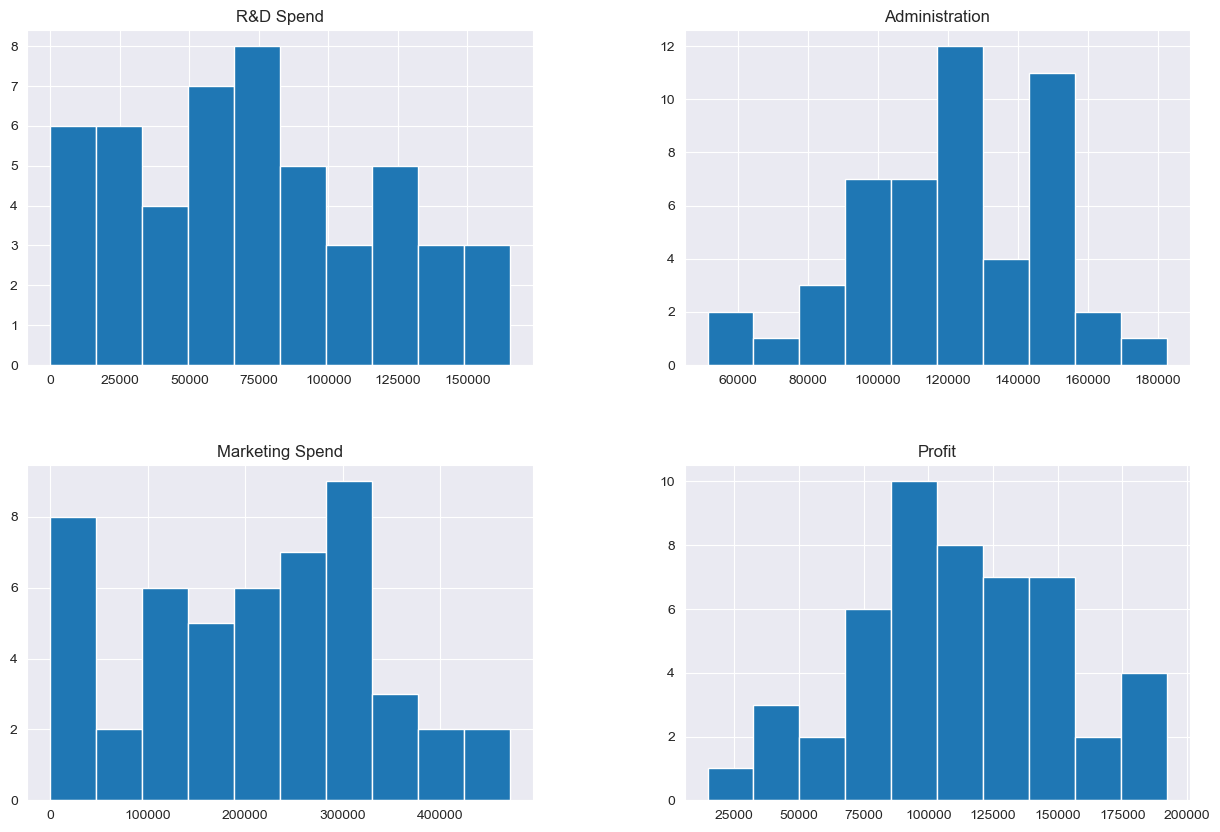

In [11]:
sns.set_style(style='darkgrid')
startup.hist(figsize=(15,10))
plt.show()

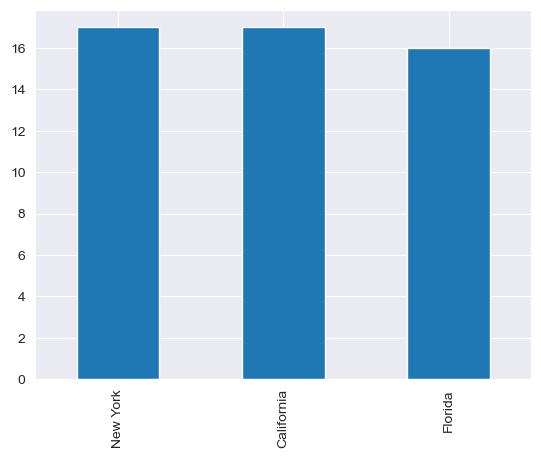

In [12]:
startup['State'].value_counts().plot(kind='bar')
plt.show()

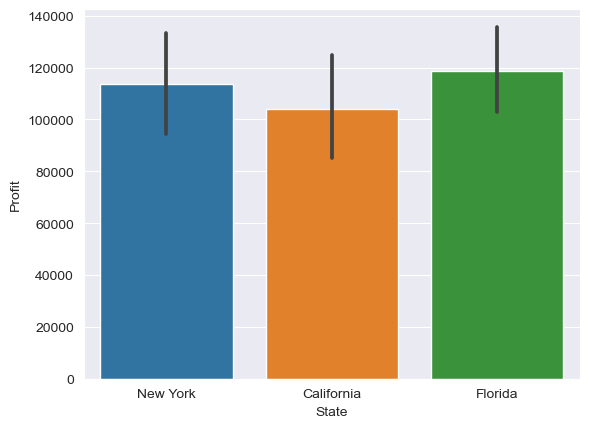

In [15]:
sns.barplot(x='State',y='Profit',data=startup)
plt.show()

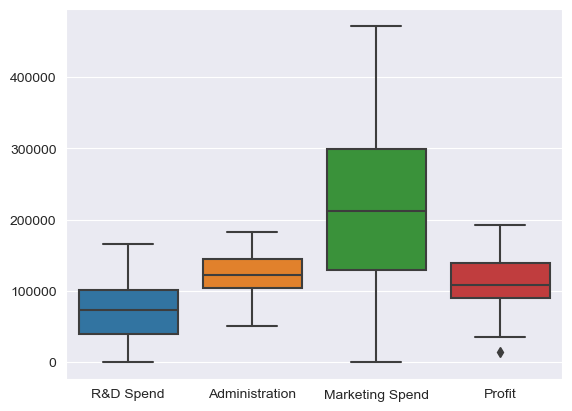

In [17]:
# using box plot checking wheather outliers is there or not
sns.boxplot(data=startup);

In [18]:
#droping the outlier
Q1=np.quantile(startup['Profit'],.25)
Q3=np.quantile(startup['Profit'],.75)
iqr=Q3-Q1
lq=Q1-1.5*iqr
uq=Q3+1.5*iqr

startup['Profit']=startup['Profit'][(startup.Profit>lq) & (startup.Profit<uq)]

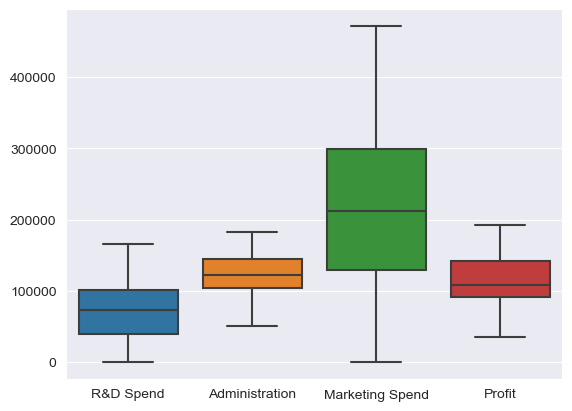

In [19]:
sns.boxplot(data=startup);

In [20]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             1
dtype: int64

In [22]:
startup['Profit']=startup['Profit'].fillna(lq,axis=0)

In [24]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [26]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [33]:
model = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data=startup).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     300.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           3.22e-30
Time:                        01:13:41   Log-Likelihood:                -524.95
No. Observations:                  50   AIC:                             1058.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.019e+04   6515.750      7.702      0.000    3.71e+04    6.33e+04
RandD_Spend         0.8051      0.045     17.987      0.000       0.715       0.895
Administration     -0.0267      0.051     -0.528      0.600      -0.129       0.075
Marketing_Spend     0.0272      0.016      1.666      0.103      -0.006       0.060
==============================================================================
Omnibus:                       13.316   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.761
Skew:                          -0.888   Prob(JB):                     0.000139
Kurtosis:                       5.317   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculating VIF

In [34]:
rqs_rs = smf.ols("RandD_Spend~Administration+Marketing_Spend",data=startup).fit().rsquared
vif_rs = 1/(1-rqs_rs)
rqs_ad = smf.ols("Administration~RandD_Spend+Marketing_Spend",data=startup).fit().rsquared
vif_ad = 1/(1-rqs_ad)
rqs_ms = smf.ols("Marketing_Spend~Administration+RandD_Spend",data=startup).fit().rsquared
vif_ms = 1/(1-rqs_ms)

In [35]:
# Storing vif values in a data frame
d1 = {'Variables':['RandD_SPend','Administration','Marketing Spend'],'VIF':[vif_rs,vif_ad,vif_ms]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,RandD_SPend,2.468903
1,Administration,1.175091
2,Marketing Spend,2.326773


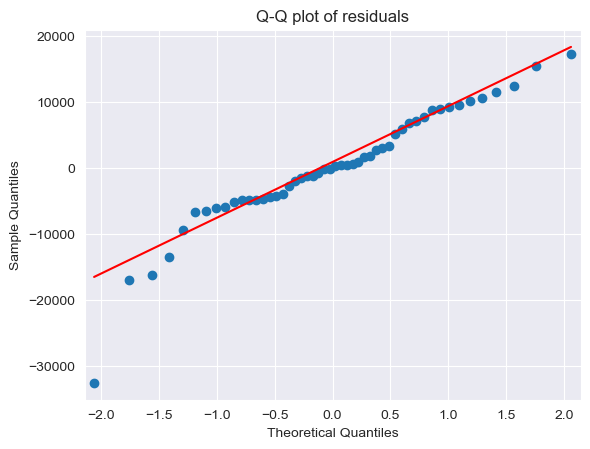

In [36]:
# Finding normality of residuals
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot of residuals")
plt.show()

### High Influence Point

In [37]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

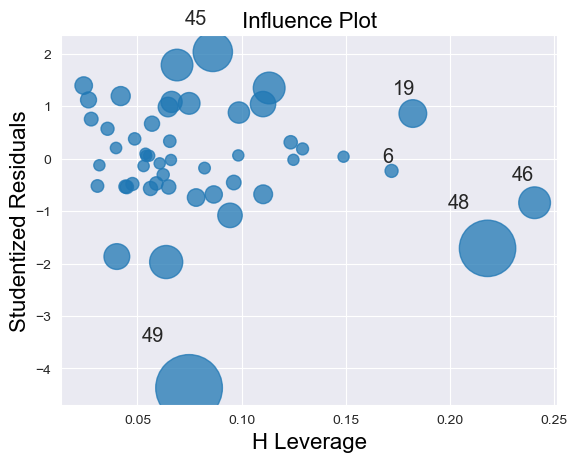

In [38]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.graphics.influence_plot(model)
plt.show()

### Model Deletion Diagnostics
### Detecting Influencers/Outlirs
### Cook's Distance

In [39]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
k = 3
n = 50
3*(k+1)/n

0.24

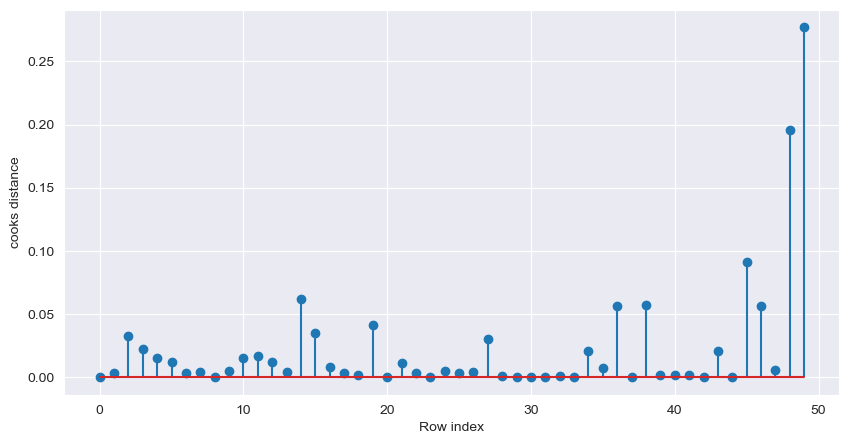

In [42]:
fig=plt.figure(figsize=(10,5))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [43]:
np.where(c>0.24)

(array([49], dtype=int64),)

In [45]:
(np.argmax(c),np.max(c))

(49, 0.2768923816356961)

In [48]:
startup = startup.drop(startup.index[49],axis=0)

In [49]:
startup.shape

(49, 5)

In [50]:
#Reset the index and re arrange the row values
startup=startup.reset_index()

In [52]:
startup.head()

,index,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:
startup=startup.drop(['index'],axis=1)

In [54]:
startup.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Best Model Building

In [57]:
best_model = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data=startup).fit()
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           8.85e-32
Time:                        01:33:42   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RandD_Spend         0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
print(best_model.rsquared,best_model.aic)

0.9613162435129847 1020.5652974526367


In [59]:
round(best_model.predict(startup[["RandD_Spend","Administration","Marketing_Spend"]]),3)

0     190716.677
1     187537.122
2     180575.526
3     172461.145
4     170863.487
5     162582.583
6     157741.339
7     159347.735
8     151328.827
9     154236.847
10    135507.793
11    135472.856
12    129355.599
13    127780.129
14    149295.405
15    145937.942
16    117437.628
17    130408.626
18    129129.234
19    116641.003
20    117097.732
21    117911.019
22    115248.218
23    110603.139
24    114051.074
25    103398.054
26    111547.639
27    114916.165
28    103027.229
29    103057.622
30    100656.410
31     99088.214
32    100325.741
33     98962.303
34     90552.308
35     91709.289
36     77080.554
37     90722.503
38     71433.022
39     85147.376
40     76625.510
41     76492.145
42     72492.395
43     62592.050
44     67025.731
45     50457.297
46     58338.444
47     49375.777
48     51658.097
dtype: float64